In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/Colab\ Notebooks/Machine\ Learning/Lab\ 8\ -\ Random\ Forest\ +\ Clustering

/content/drive/MyDrive/Colab Notebooks/Machine Learning/Lab 8 - Random Forest + Clustering


In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import pydotplus
from sklearn import tree
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Random Forest.csv")
df.head(18)

,Weather,Time of Week,Time of Day,Traffic Jam
0,Clear,Workday,Morning,Yes
1,Clear,Workday,Lunch,No
2,Clear,Workday,Evening,Yes
3,Clear,Weekend,Morning,No
4,Clear,Weekend,Lunch,No
5,Clear,Weekend,Evening,No
6,Rainy,Workday,Morning,Yes
7,Rainy,Workday,Lunch,Yes
8,Rainy,Workday,Evening,Yes
9,Rainy,Weekend,Morning,No


In [ ]:
encoder = preprocessing.LabelEncoder()
df["Weather"] = encoder.fit_transform(df["Weather"]).astype("int")
df[["Time of Week"]] = encoder.fit_transform(df[["Time of Week"]]).astype("int")
df[["Time of Day"]] = encoder.fit_transform(df[["Time of Day"]]).astype("int")
df[["Traffic Jam"]] = encoder.fit_transform(df[["Traffic Jam"]]).astype("int")
df.head(18)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Weather,Time of Week,Time of Day,Traffic Jam
0,0,1,2,1
1,0,1,1,0
2,0,1,0,1
3,0,0,2,0
4,0,0,1,0
5,0,0,0,0
6,1,1,2,1
7,1,1,1,1
8,1,1,0,1
9,1,0,2,0


In [ ]:
#Using RandomForest for Classificatiom
classifier = RandomForestClassifier(n_estimators=5)
classifier.fit(df[['Weather', 'Time of Week', 'Time of Day']], df['Traffic Jam'])

#Predictions
# ["Snowy", "Workday", "Morning"]
print(classifier.predict([[2, 1, 2]]))

# ["Clear", "Weekend", "Lunch"]
print(classifier.predict([[0, 0, 1]]))

[1]
[0]


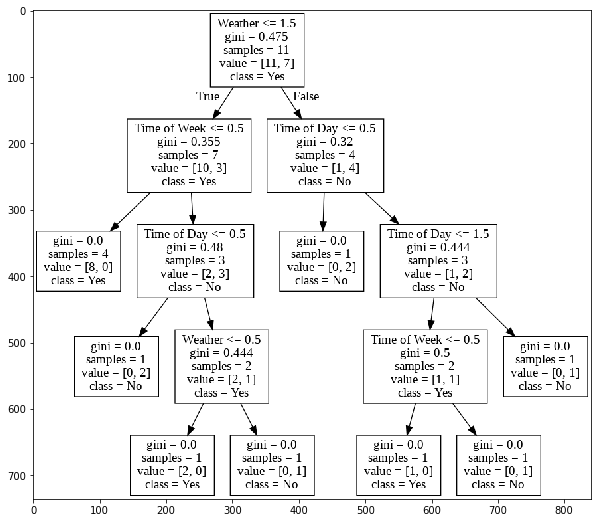

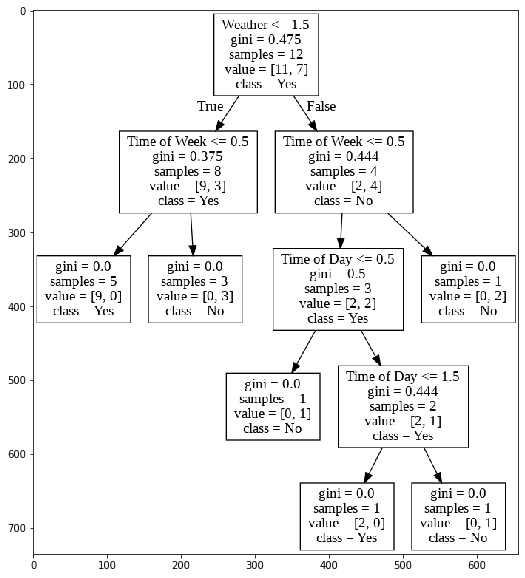

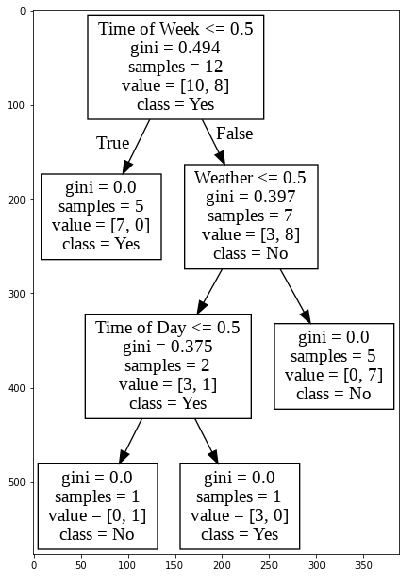

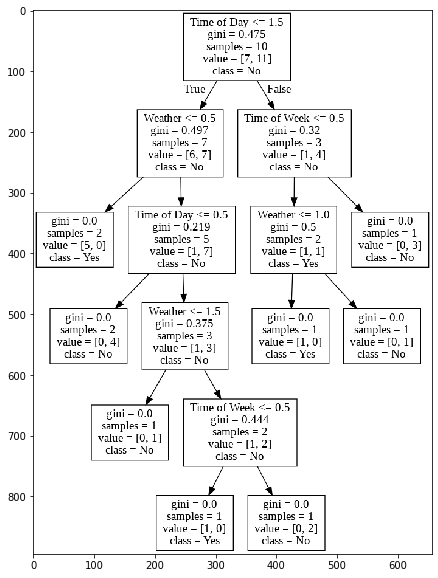

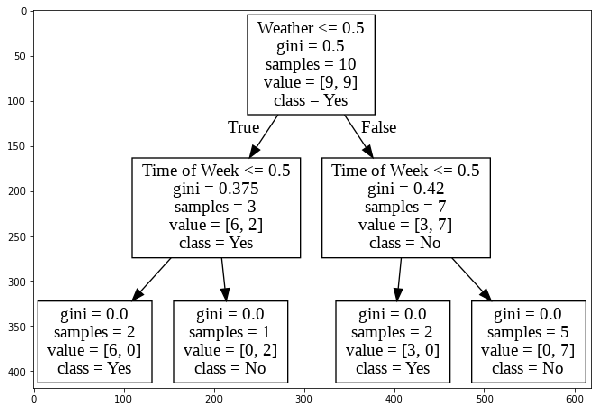

In [ ]:
for index in range(len(classifier.estimators_)):
    feature_names = ['Weather', 'Time of Week', 'Time of Day']
    target_names = ['Yes', 'No']
    
    # Build the data
    dot_data = tree.export_graphviz(classifier.estimators_[index], out_file=None, feature_names=feature_names, class_names=target_names)
    
    # Build the graph
    graph = pydotplus.graph_from_dot_data(dot_data)

    # Write the image
    Image(graph.create_png())
    graph.write_png("tree" + str(index) + ".png")
    img = mpimg.imread("tree" + str(index) + ".png")
    plt.figure(figsize=(10, 10))
    plt.imshow(img,interpolation='nearest')    